In [4]:
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np
import shap
import time
import joblib
X,y = shap.datasets.diabetes()
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# rather than use the whole training set to estimate expected values, we summarize with
# a set of weighted kmeans, each weighted by the number of points they represent.
X_train_summary = shap.kmeans(X_train, 10)

def print_accuracy(f):
    print("Root mean squared test error = {0}".format(np.sqrt(np.mean((f(X_test) - y_test)**2))))
    time.sleep(0.5) # to let the print get out before any progress bars

shap.initjs()

Root mean squared test error = 72.73430161947662


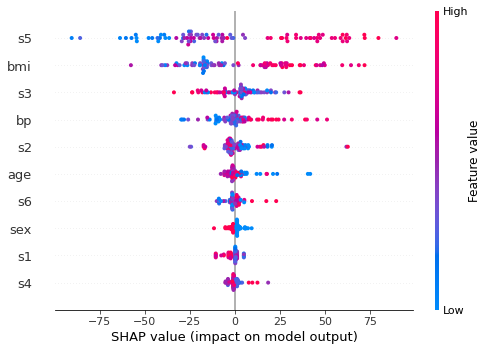

In [5]:
from sklearn import tree
dtree = tree.DecisionTreeRegressor(min_samples_split=20)
dtree.fit(X_train, y_train)
print_accuracy(dtree.predict)

# explain all the predictions in the test set
ex = shap.TreeExplainer(dtree)
shap_values = ex.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [ ]:
ex = shap.KernelExplainer(dtree.predict, X_train)
shap_values = ex.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

Using 353 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/89 [00:00<?, ?it/s]

Using 353 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/353 [00:00<?, ?it/s]

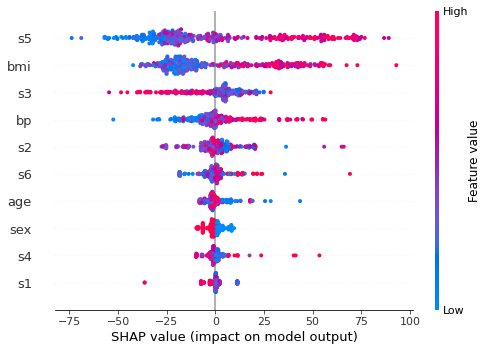

In [6]:
ex = shap.KernelExplainer(dtree.predict, X_train)
shap_values = ex.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

In [7]:
X_train.to_csv(r'C:\Users\gvarv\anaconda3\envs\thesis\BankLoan\X_trainDiabetesDecisionTree.csv', index = False, header=True)

In [10]:
joblib.dump(dtree, 'DiabetesDecisionTreeModel.pkl')

['DiabetesDecisionTreeModel.pkl']

Using 353 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/353 [00:00<?, ?it/s]

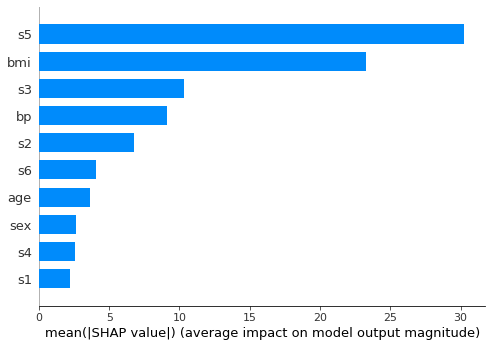

In [6]:
explainer = shap.KernelExplainer(dtree.predict, X_train)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type='bar', sort=True)

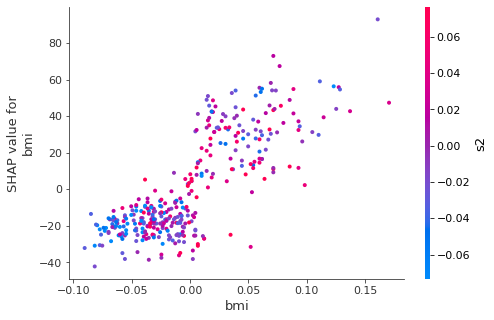

In [7]:
shap.dependence_plot("bmi",shap_values, X_train)